In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.read_csv('https://raw.githubusercontent.com/thomouvic/SENG474/main/data/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Data Structure

In [3]:
housing.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# for categorical data we can use value_counts() to see the distribution of values
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
# for numerical data we can use describe() to see the distribution of values
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


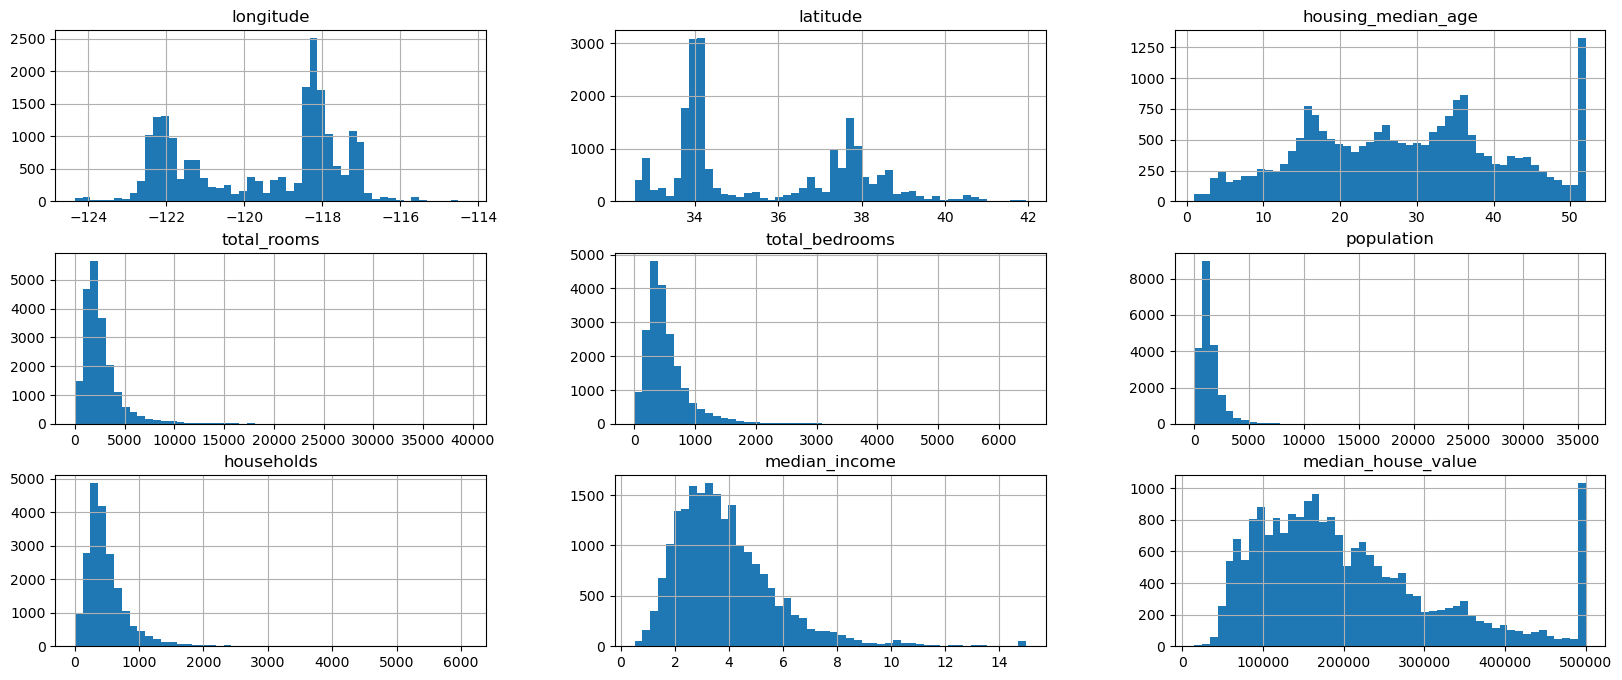

In [6]:
# we can plot the histogram of the numerical data to see the distribution of values
housing.hist(bins=50, figsize=(20,8));

## Key Observations from the Histograms

1. **Longitude and Latitude**:
   - The data is geographically concentrated around specific regions (e.g., latitude between 34 and 38, longitude between -124 and -118). 
   This is because the dataset covers California (density of population around San Francisco and Los Angeles).

2. **Housing Median Age**:
   - The distribution is somewhat uniform with peaks at ages 20 and 50, indicating a significant number of older houses. 
   The spike at 50 suggests a capping of the data for older houses.

3. **Total Rooms**:
   - The distribution is right-skewed, meaning most houses have fewer rooms, with a few houses having a large number of rooms.

4. **Total Bedrooms**:
   - Similar to total rooms, this is also right-skewed.

5. **Population**:
   - This is heavily right-skewed, meaning there are many small communities or neighborhoods and a few larger ones.

6. **Households**:
   - This mirrors the population histogram, which makes sense since households typically correlate with population size.

7. **Median Income**:
   - The data is relatively symmetric with a slight right skew, concentrated between incomes of 2 and 6, indicating a normal income distribution around a lower-middle income bracket.

8. **Median House Value**:
   - This is right-skewed, with a noticeable cap at 500,000, indicating an upper limit for house values in the dataset.


**Summary**: Many of the variables (features) exhibit right-skewness, suggesting that most homes and households in the dataset fall within lower to mid-range values for rooms, bedrooms, and income, with a few outliers that are significantly higher.


# Create Test Set

In [7]:
# using scikit-learn
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

len(train_set), len(test_set)

(16512, 4128)

# Explore and Visualize Data

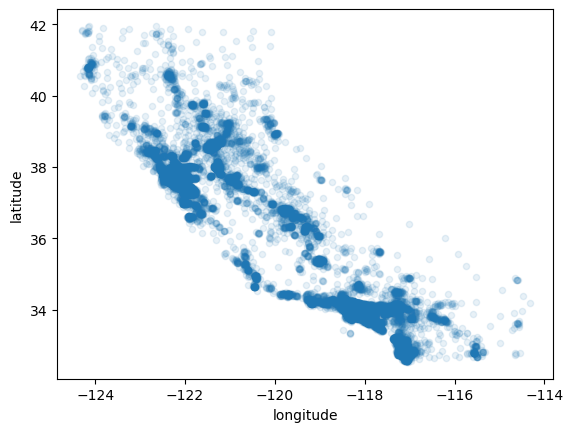

In [8]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1);

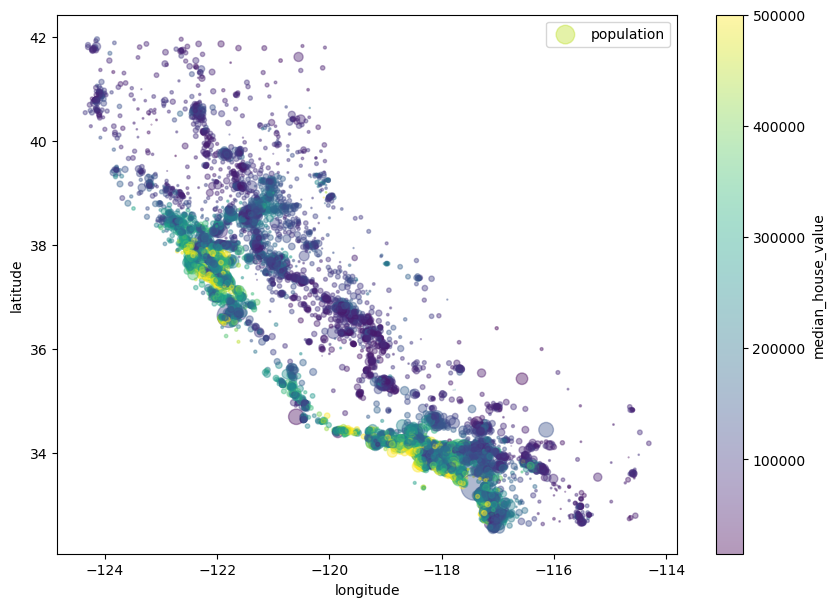

In [9]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
             s=housing["population"]/100, 
             label="population", 
             figsize=(10,7), 
             c="median_house_value", 
             colorbar=True);

In [10]:
# Let's look at the correlation matrix of the numerical attributes

# select numerical attributes using pandas and numpy
housing_num = housing.select_dtypes(include=[np.number])
housing_num.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


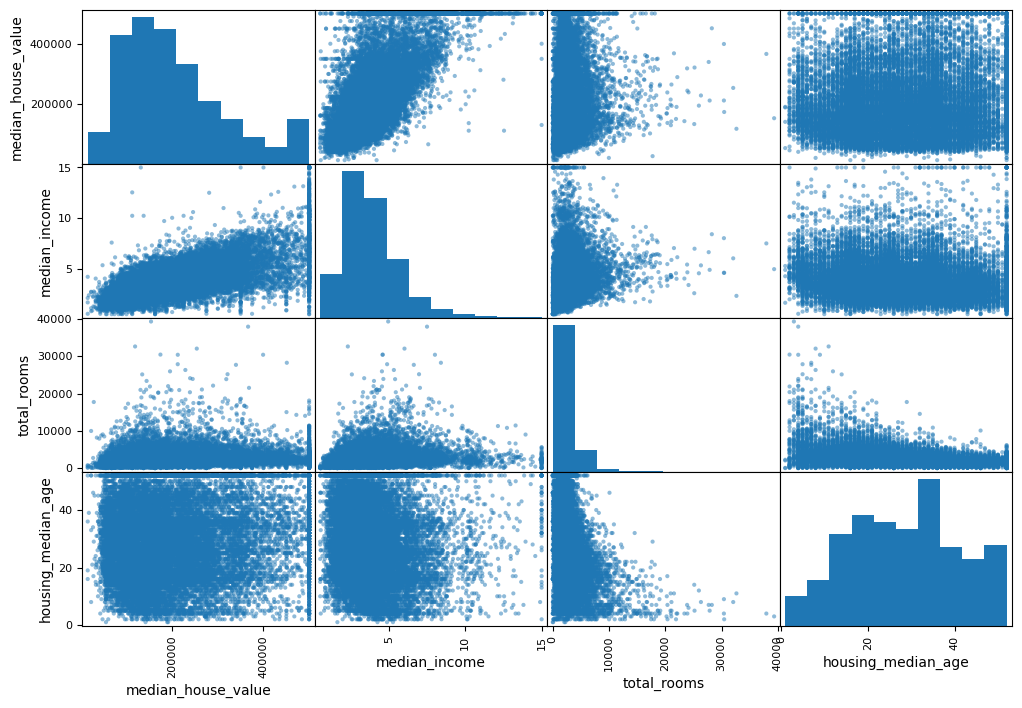

In [11]:
# Now let's look at the scatter matrix of some of the numerical attributes

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
pd.plotting.scatter_matrix(housing[attributes], figsize=(12, 8));

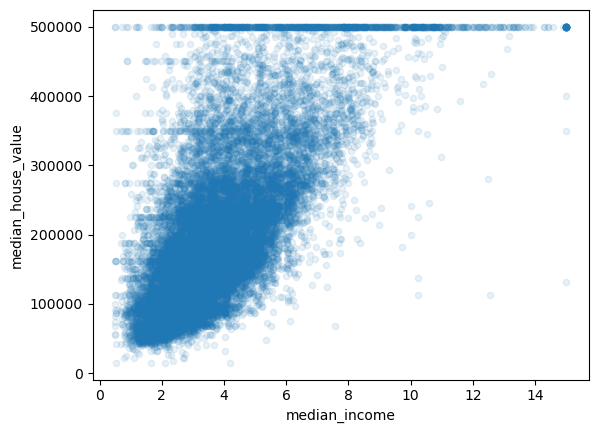

In [12]:
# Now let's look at the scatter plot of median_income vs median_house_value

housing.plot(kind="scatter", x="median_income", 
             y="median_house_value", alpha=0.1);

### Key Observations from Scatter Plot: Median Income vs. Median House Value:

1. **Positive Correlation**:
   - There is a clear positive correlation between median income and median house value. As median income increases, median house value tends to increase as well.

2. **Capped House Values**:
   - Many data points are capped at a median house value of 500,000. This suggests that the dataset might have an upper limit on house prices, creating a ceiling effect that limits higher values.

3. **Concentration of Data**:
   - Most of the data points are concentrated in lower income ranges (median income between 2 and 6), and the house values for these ranges vary widely from below 100,000 to near the 500,000 mark.

4. **Outliers**:
   - A few outliers can be observed at higher median incomes (above 10), where house prices vary more significantly and seem less predictable.

**Summary:** This scatter plot reveals a positive relationship between income and house prices, but the ceiling effect at 500,000 limits the ability to observe higher house values, potentially affecting model performance for high-end predictions.


# Attribute Combinations

In [13]:
# experimenting with attribute combinations
housing["rooms_per_house"] = housing["total_rooms"]/housing["households"]

housing["bedrooms_ratio"] = housing["total_bedrooms"]/housing["total_rooms"]

housing["population_per_house"]=housing["population"]/housing["households"]

In [14]:
housing_num = housing.select_dtypes(include=[np.number])
corr_matrix = housing_num.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.688075
rooms_per_house         0.151948
total_rooms             0.134153
housing_median_age      0.105623
households              0.065843
total_bedrooms          0.049686
population_per_house   -0.023737
population             -0.024650
longitude              -0.045967
latitude               -0.144160
bedrooms_ratio         -0.255880
Name: median_house_value, dtype: float64

### Key Observations:

1. **Creating New Features**:
   - By experimenting with attribute combinations, we created new features such as **rooms_per_house**, **bedrooms_ratio**, and **population_per_house**. These new attributes show stronger correlations (or anti-correlations) with **median_house_value** compared to their original counterparts.

2. **Rooms per House**:
   - The newly created **rooms_per_house** feature shows a higher positive correlation (0.151) with house value compared to the original **total_rooms** (0.134). This suggests that the number of rooms per household is a more meaningful predictor of house prices than the total number of rooms alone.

3. **Bedrooms Ratio**:
   - The **bedrooms_ratio** feature, which represents the ratio of bedrooms to total rooms, exhibits a noticeable negative correlation (-0.255). This is more informative than the original **total_bedrooms** (0.049) and suggests that houses with a higher ratio of bedrooms to total rooms tend to have lower values, possibly due to inefficient space usage.

**Summary:**
By combining existing attributes, we generate new features that have stronger correlations with **median_house_value**, making them more useful for predictive modeling.
